### Milestone 1

#### Research Topic: 
   Is it possible for a company to develop its business by researching the personality of its ideal customers? 

#### Background: 
In any retail company like Amazon.com, the customers tend to spend and purchase more when there is a high activity on website of the company. Customers who are just browsing through company’s services, they've expressed an interest but have yet to decide. We can make the company's website interesting and appealing and keep the design fresh. By designing the correct website interaction techniques, we can ensure that we direct onlookers’ attention to the right spots. This will benefit the company. We also saw that customers who has high income tend towards the purchasing more on company website. This is also considered as Customer Personality Analysis. Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. It also helps a business to modify its product based on its target customers from different types of customer segments.

#### Objective: 
My main objective is to create a solution or build a model to address this problem of understanding the customer’s attributes like their purchases, income or location and provide a helpful insight to a company that implement this solution.

#### Dataset: 
The dataset I retrieved is from an online source where it provides the attributes of the Customers, Companies products details, Promotions offers by the company and the mode of purchases by the customers. As explained below the dataset contains each individual customer and with respective provide data, number of purchases etc. We will got through the data in detailed as we dig deep into data and clean it for our analysis.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
from datetime import datetime, date

In [10]:
# Reading the data from the .csv file.
cust_df = pd.read_csv("Data/customer_data.csv", sep='\t')

In [9]:
cust_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
# Total amount spent on wine by customers.
wine_amt = cust_df.MntWines.sum()
# Total amount spent on fruits by customers.
fruits_amt = cust_df.MntFruits.sum()
# Total amount spent on meat by customers.
meat_amt = cust_df.MntMeatProducts.sum()
# Total amount spent on fish by customers.
fish_amt = cust_df.MntFishProducts.sum()
# Total amount spent on sweets by customers.
sweets_amt = cust_df.MntSweetProducts.sum()

data = {'Products': ['wine','fruits','meat','fish','sweets'] ,'Amount': [wine_amt, fruits_amt, meat_amt, fish_amt, sweets_amt]}
products_df = pd.DataFrame(data=data)
products_df

,Products,Amount
0,wine,680816
1,fruits,58917
2,meat,373968
3,fish,84057
4,sweets,60621


Visualization 1: Bar graph of Revenue to the company in last 2 years - Product wise.

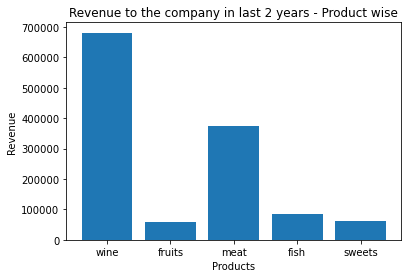

In [15]:
plt.bar(products_df['Products'], products_df['Amount'])
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.title('Revenue to the company in last 2 years - Product wise')
plt.show()

The above Bar graph explains about the products on which the company is generating the revenue. By looking at the graph it showa that Wine product is generating more revenue to the company in the last 2 years.




Visualization 2: Histogram of the number of customers compained in the last 2 years

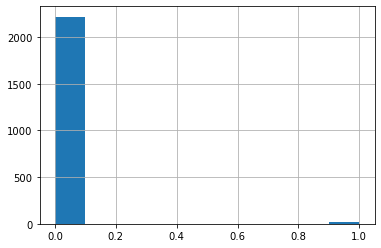

In [55]:
# Complain: 1 if the customer complained in the last 2 years, 0 otherwise
cust_df.Complain.hist()
plt.show()

The above Histogram explains about the number of customers compained in the last 2 years. We can understand that there are very less number of customers who complained on the products

Visualization 3: Pie chart of place where the customers purchasing the products.

In [56]:
# Total purchases from Web: 
NumWebPur = cust_df.NumWebPurchases.sum()
# Total purchases from catalog: 
NumCatalogPur = cust_df.NumCatalogPurchases.sum()
# Total purchases from store: 
NumStorePur = cust_df.NumStorePurchases.sum()

data = {'Place': ['Web','Catalog','Store'] ,'NumOfPurchases': [NumWebPur, NumCatalogPur, NumStorePur]}
placepur_df = pd.DataFrame(data=data)
placepur_df

,Place,NumOfPurchases
0,Web,9150
1,Catalog,5963
2,Store,12970


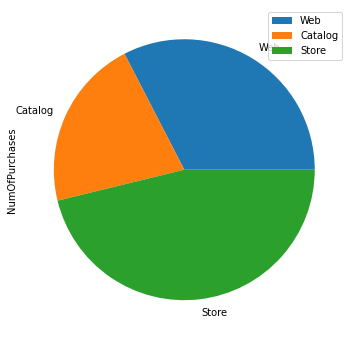

In [52]:
placepurp_df.plot.pie(y='NumOfPurchases', figsize=(8, 6))
plt.show()

The above Pie chart shows that customers are more inclined towards going to store and purchasing the products. So we can focus on the updating the store with customer friendly environment.

Visualization 4: Histogram of the Reponse of the customer whether he accepted the offer in the last campaign or not.

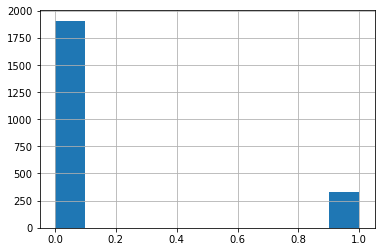

In [54]:
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
cust_df.Response.hist()
plt.show()

Above graph explains about number of customer accepted the offer on deals that the company has provided. It looks like very less number of the customer has accepted the offer in the last campaign. So the campaign deals have the increased to attract more customers.

### Milestone 2

In [5]:
# Loading the data into data from the .csv file.
cust_df = pd.read_csv("Data/customer_data.csv", sep='\t')

# Checking the data frame.
cust_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Drop any features that are not useful for your model building and explain why they are not useful.

In [6]:
# Step 1:
# Identifying unwanted columns and deleting them from data frame as they are not required for our analysis.

# Removing unwanted columns from dataframe.
cust_df = cust_df.drop(['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Z_CostContact','Z_Revenue'], axis = 1)

# Checking data frame columns.
cust_df.columns

Index(['ID', 'Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')

#### Engineer new useful features.

In [7]:
# Step 2:

# Adding 'Age' column to dataframe.

# Function to convert given birth date to age.
def age(born):
    born = datetime.strptime(str(born), "%Y").date()
    today = date.today()
    return today.year - born.year

# Creating 'Age' column and adding its appropriate values.
cust_df['Age'] = cust_df['Year_Birth'].apply(age)

# Checking data frame.
cust_df.head()

,ID,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,5524,1957,58138.0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,1,65
1,2174,1954,46344.0,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,68
2,4141,1965,71613.0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,57
3,6182,1984,26646.0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,38
4,5324,1981,58293.0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,41


We have added a new column 'Age' to determine the age of the customers and understand the demographics of the customer population and their purchases.

#### Transform features if necessary.

In [9]:
# Step 3:
# Converting the data frame columns to appropriate datatypes.

# Checking the column data types.
cust_df.dtypes

ID                       int64
Year_Birth               int64
Income                 float64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Response                 int64
Age                      int64
dtype: object

In [10]:
# Converting 'Dt_Customer' column to datetime datatype.
cust_df['Dt_Customer'] = pd.to_datetime(cust_df['Dt_Customer'])

# Checking the column data types.
cust_df.dtypes

ID                              int64
Year_Birth                      int64
Income                        float64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
Response                        int64
Age                             int64
dtype: object

#### Deal with missing data

In [11]:
# Step 4:

# Checking the missing data.
cust_df.isnull().sum()

ID                      0
Year_Birth              0
Income                 24
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
Age                     0
dtype: int64

In [12]:
# Updating null values to zeros to avoid graphical errors.
cust_df['Income'] = cust_df['Income'].fillna(0)

# Re-checking the missing data.
cust_df.isnull().sum()

ID                     0
Year_Birth             0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
Age                    0
dtype: int64

For the Income column we had some null values which may distrupt our graphs. We replaced the null values to Zeroes.

As we do not any categorical data, there is no need of creating dummy variables.

Summary of the steps performed:

Step 1: Identified unwanted columns and deleting them from data frame as they are not required for our analysis.

Step 2: Added 'Age' column to dataframe.

Step 3: Converted the data frame columns to appropriate datatypes.

Step 4: Verified the missing data and updated null values to zeros.